In [28]:
import pandas as pd
import yfinance as yf
import seaborn as sns
from scipy import stats
import os
from dotenv import load_dotenv
import fredapi
from fredapi import Fred
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
api_key = os.getenv('FRED_API_KEY')
fred = Fred(api_key=api_key)

##### Beginning May 2020, M2 consists of M1 plus (1) small-denomination time deposits (time deposits in amounts of less than $100,000) less IRA and Keogh balances at depository institutions; and (2) balances in retail MMFs less IRA and Keogh balances at MMFs. Seasonally adjusted M2 is constructed by summing savings deposits (before May 2020), small-denomination time deposits, and retail MMFs, each seasonally adjusted separately, and adding this result to seasonally adjusted M1.
Source: https://fred.stlouisfed.org/series/M2SL

In [37]:
# Pull M2 Supply data
m2_supply = fred.get_series('M2SL', observation_start='2010-01-01', observation_end='2022-07-02')
m2_supply = m2_supply.dropna()
m2_supply.tail()

2022-03-01    21739.7
2022-04-01    21644.2
2022-05-01    21649.2
2022-06-01    21607.7
2022-07-01    21636.2
dtype: float64

In [38]:
# Pull S&P Index historical values from yfinance API
ticker = "^GSPC" 
start= "2010-01-01" 
end= "2021-07-02"

sp_history = yf.download(ticker, start=start, end=end, progress=False)
sp_history = sp_history.asfreq(freq='D').ffill().dropna()
sp_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-27,4274.450195,4286.120117,4271.160156,4280.700195,4280.700195,6.248390e+09
2021-06-28,4284.899902,4292.140137,4274.669922,4290.609863,4290.609863,3.415610e+09
2021-06-29,4293.209961,4300.520020,4287.040039,4291.799805,4291.799805,3.049560e+09
2021-06-30,4290.649902,4302.430176,4287.959961,4297.500000,4297.500000,3.687880e+09
2021-07-01,4300.729980,4320.660156,4300.729980,4319.939941,4319.939941,3.077580e+09


In [39]:
# Pull Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL)
cpi = fred.get_series('CPIAUCSL', observation_start='2010-01-01', observation_end='2022-07-02')
cpi.tail()

2022-03-01    287.708
2022-04-01    288.663
2022-05-01    291.474
2022-06-01    295.328
2022-07-01    295.271
dtype: float64

In [40]:
# Pull US GDP data
gdp = fred.get_series('GDP', observation_start='2010-01-01')
gdp.tail()

2021-07-01    23550.420
2021-10-01    24349.121
2022-01-01    24740.480
2022-04-01    25248.476
2022-07-01    25663.289
dtype: float64

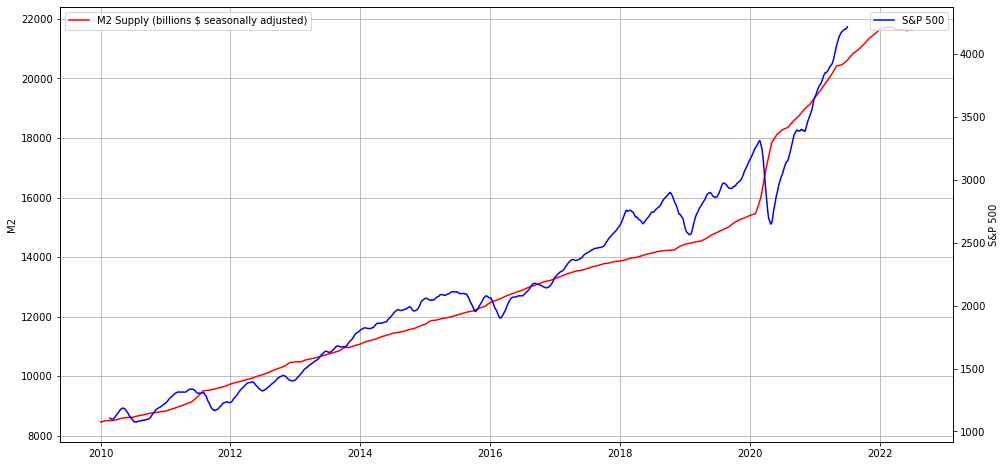

In [44]:
# Plot M2 Supply vs S&P 500
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(m2_supply, label ='M2 Supply (billions $ seasonally adjusted)', color='r')
ax.set_ylabel('M2')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(sp_history['Adj Close'].rolling(window=50).mean(), label ='S&P 500', color='b')
ax2.set_ylabel('S&P 500')
ax2.legend(loc='upper right')

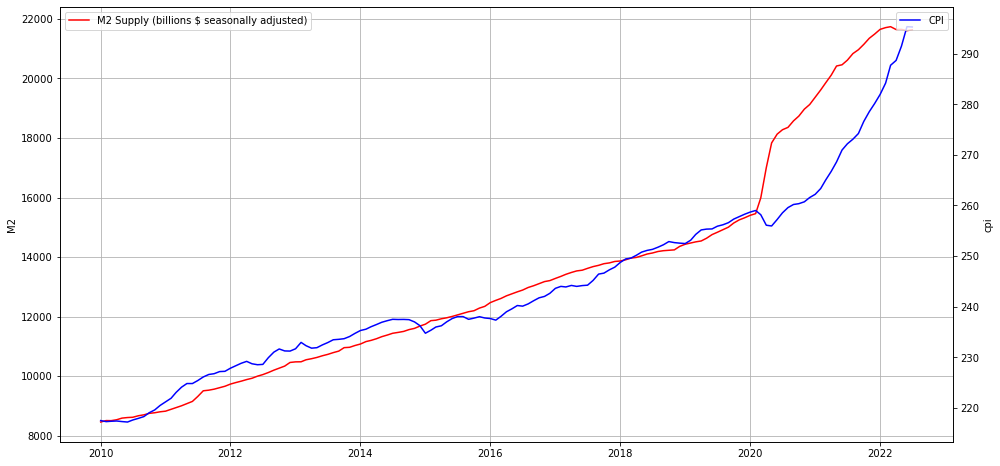

In [35]:
# Plot M2 Supply vs CPI
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(m2_supply, label ='M2 Supply (billions $ seasonally adjusted)', color='r')
ax.set_ylabel('M2')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(cpi, label ='CPI', color='b')
ax2.set_ylabel('cpi')
ax2.legend(loc='upper right')

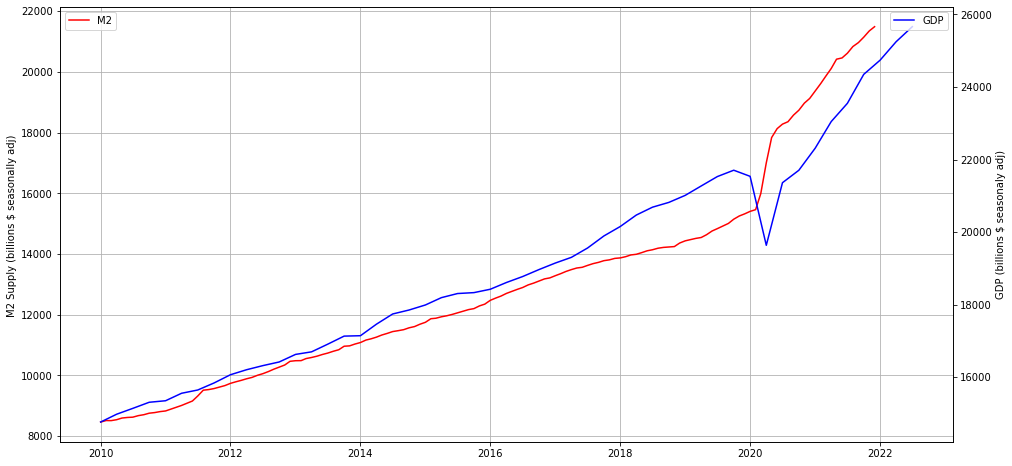

In [36]:
# Plot M2 Supply vs GDP
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(m2_supply[:'2021'], label ='M2', color='r')
ax.set_ylabel('M2 Supply (billions $ seasonally adj) ')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(gdp, label ='GDP', color='b')
ax2.set_ylabel('GDP (billions $ seasonaly adj)')
ax2.legend(loc='upper right')